In [1]:
import numpy as np
from bayesian_opt import *
from rbf_opt import *
from orthog_poly_opt import *

In [2]:
%matplotlib inline

# One-dimensional function

We use the Ackley 1 function to test our optimization methods:

$$ f(\mathbf{x}) = -20e^{-0.02\sqrt{D^{-1}\sum_{i=1}^Dx_i^2}} - e^{D^{-1}\sum_{i=1}^D\cos(2\pi x_i)} + 20 + e, $$

where $D$ is the dimension. The global minima is $f(\mathbf{x}^*)=0$, and it's located at $\mathbf{x}^*=\mathbf{0}$.

In [3]:
def ackley1(x):
    x = np.array([x]).flatten()
    d = len(x) # dimension
    
    return -20*np.exp(-0.02*np.sqrt(1/d*np.sum(x**2))) - np.exp(1/d*np.sum(np.cos(2*np.pi*x))) + 20 + np.exp(1)

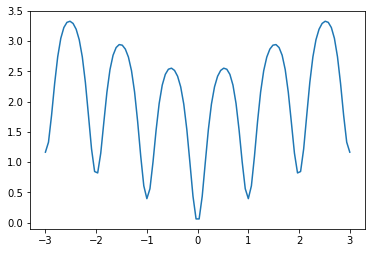

In [4]:
x = np.linspace(-3,3,num=100)
y = [ackley1(i) for i in x]
plt.plot(x, y)

## Bayesian optimization

Sobol sequence is used for generating the initial points. After that, we run the Bayesian optimization steps until $y$ is convereged (the tolerance is set to be $0.01$ here). For each step, the algorithm tries to find the best next point. Then we evaluate the function at that point, and add the point and its value to the observed list.

In [5]:
# generate Sobol points
sys.path.append('../HW2')
import seq

def get_sobol_points(num, dim=1):
    x = seq.SobolSeq(num, dim).get()*6-3
    y = [ackley1(x[i]) for i in range(num)]
    return x, y

init_x ,init_y = get_sobol_points(8)
print(init_x)
print(init_y)

[[-3.  ]
 [ 0.  ]
 [ 1.5 ]
 [-1.5 ]
 [-0.75]
 [ 2.25]
 [ 0.75]
 [-2.25]]
[1.1647093283150274, 4.4408920985006262e-16, 2.9414917163174406, 2.9414917163174406, 2.0160430363977935, 2.5983321917970454, 2.0160430363977935, 2.5983321917970454]


Notice that the optimal $\mathbf{x}^*=\mathbf{0}$ is already included in the Sobol sequence. To make the optimization problem a bit harder, here we manually remove $\mathbf{x}^*$ from the list.

In [6]:
init_x = np.delete(init_x, 1, 0)
init_y = np.delete(init_y, 1, 0)

### Nelder-Mead optimization
Since the Nelder-Mead optimization would only find local optimum, we will run the method several times to find the global optimum. The initial guesses are generated from the Sobol sequence.

In [12]:
import warnings; warnings.simplefilter('ignore')

def initialize_bo(bo):
    bo.initialize(x=init_x, y=init_y)
    
def run_bo(bo, max_steps=20):
    for i in range(max_steps):
        print('Step %d: %f' % (i+1, bo.x_next))
        bo.update([ackley1(bo.x_next)])
        if bo.converged:
            print('Converged!')
            break

bo = BayesianOptimization(bounds=[[-3,3]], tol=1e-2)
bo.opt_method = 'nelder-mead'
initialize_bo(bo)
run_bo(bo)

Step 1: 0.007228
Step 2: -0.011659
Step 3: 0.090504
Step 4: -0.260171
Step 5: -2.728852
Step 6: 0.396103
Step 7: 1.072881
Step 8: -1.077192
Step 9: 1.202932
Step 10: 0.958248
Step 11: 1.885915
Step 12: -1.894735
Step 13: -1.208366
Step 14: -0.959841
Converged!


The algorithm is converged, and we find that the minimum is pretty close to the theoritical value ($y_{min}=0$).

x =  [ 0.00722762]
y =  0.00569185806195


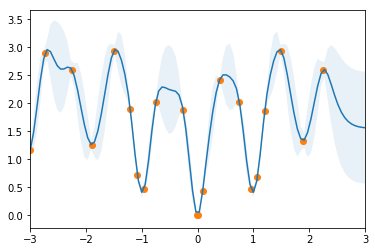

In [13]:
def print_out_min(method):
    print('x = ', method.xbest)
    print('y = ', method.ybest)
    
print_out_min(bo)
bo.plot()

### Simulated Annealing

Next, we use the simulated annealing to find the minimum. The algorithm is able to find the global minimum in theory.

In [14]:
bo.opt_method = 'anneal'
initialize_bo(bo)
run_bo(bo)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -0.00   100.00%    50.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
  8278.27804         -0.05   100.00%    60.00%     0:00:00     0:00:01

Step 1: 0.010181


     2.50000         -0.01   100.00%    60.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 2: -0.116357


     2.50000         -0.01   100.00%    40.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 14385.99843         -0.00   100.00%    40.00%     0:00:00     0:00:02

Step 3: 0.131801


     2.50000         -0.00   100.00%    40.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 17295.77427         -0.00   100.00%    50.00%     0:00:00     0:00:03

Step 4: -0.018092


     2.50000         -0.00   100.00%    40.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 13120.18651         -0.00   100.00%    10.00%     0:00:00     0:00:02

Step 5: 3.000000


     2.50000         -0.03   100.00%    10.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 6: 0.131890


     2.50000         -0.00   100.00%    40.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 7: 2.712648


     2.50000         -0.00   100.00%    30.00%     0:00:02     0:00:00

Step 8: -2.718345


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -0.00   100.00%    10.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 22800.27098         -0.00   100.00%    50.00%     0:00:00     0:00:05

Step 9: -0.003399


     2.50000         -0.00   100.00%    50.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 10: 1.082152


     2.50000         -0.00   100.00%    50.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 20794.09428         -0.00   100.00%    40.00%     0:00:00     0:00:03

Step 11: -1.083570


     2.50000         -0.00   100.00%    50.00%     0:00:02     0:00:00

Step 12: -0.428486


 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -0.00   100.00%    40.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 13: 1.903601


     2.50000         -0.00   100.00%    50.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 17295.77427         -0.00   100.00%    40.00%     0:00:00     0:00:03

Step 14: -1.893757


     2.50000         -0.00   100.00%    30.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 15: -0.954689


     2.50000         -0.00   100.00%    40.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 22800.27098         -0.00   100.00%    50.00%     0:00:00     0:00:06

Step 16: 1.216696


     2.50000         -0.00   100.00%    40.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 17: 0.961080


     2.50000         -0.00   100.00%    50.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 18964.43938         -0.00   100.00%    50.00%     0:00:00     0:00:03

Step 18: 0.457094


     2.50000         -0.00   100.00%    60.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Step 19: 1.754610


     2.50000         -0.00   100.00%    40.00%     0:00:02     0:00:00

Converged!


It conerges after 19 steps, and the result is very close to the theortical value.

x =  [-0.00339852]
y =  0.00197900194488


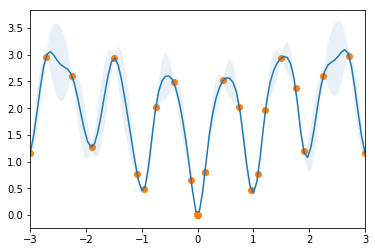

In [15]:
print_out_min(bo)
bo.plot()

### Levenberg–Marquardt algorithm

Finally, we use the Levenberg–Marquardt algorithm to find the minimum. As for the Nelder-Mead optimization, the algorithm can only find the local minimum, so several runs of the algorithm are needed.

In [17]:
bo.opt_method = 'lm'
initialize_bo(bo)
run_bo(bo)

Step 1: -2.999990
Step 2: -2.906250
Step 3: -2.834536
Step 4: -2.745839
Step 5: -2.626815
Converged!


The algorithm converges pretty fast, however a local minimum instead of the global minimum is found. We also notice that the variance around the global minimum $x^*=0$ is quite large.

x =  [-2.99999017]
y =  1.16470563016


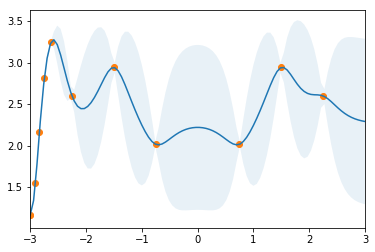

In [18]:
print_out_min(bo)
bo.plot()

## Radial basis function (RBF) interpolation

Here we interpolate the data points by using the radial basis functions, and then use the same methods as above to solve the optimization problem.

In [19]:
from scipy.interpolate import Rbf

x, y = get_sobol_points(12)

rbf = RBFOptimization(x, y, kernel='gaussian')
rbfsp = Rbf(x, y, function='gaussian', epsilon=1.0)

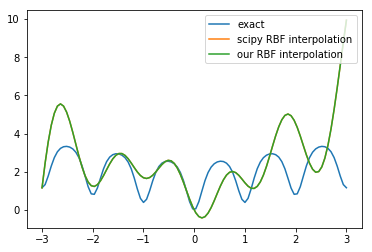

In [20]:
x_vals = np.linspace(-3,3,num=100)

plt.clf()
plt.plot(x_vals, [ackley1(i) for i in x_vals], label='exact')
plt.plot(x_vals, [rbfsp(i) for i in x_vals], label='scipy RBF interpolation')
plt.plot(x_vals, [rbf.interpolate(i) for i in x_vals], label='our RBF interpolation')
plt.legend(loc='upper right')
plt.show()

It seems that the interpolation is not accurate near the right boundary, but is relatively accurate near the origin. We also compare our implementation with `scipy`'s implementation, and they are basically the same (so you cannot see the orange line in the figure, it's just under the green line).

For the RBF interpolation above, we used Gaussian kernel. Let's also try the inverse-quadaratic kernel. Seems that it's a little better than the Gaussin kernel.

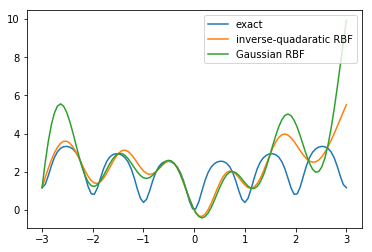

In [21]:
rbf2 = RBFOptimization(x, y, kernel='inverse')

plt.clf()
plt.plot(x_vals, [ackley1(i) for i in x_vals], label='exact')
plt.plot(x_vals, [rbf2.interpolate(i) for i in x_vals], label='inverse-quadaratic RBF')
plt.plot(x_vals, [rbf.interpolate(i) for i in x_vals], label='Gaussian RBF')
plt.legend(loc='upper right')
plt.show()

### Nelder-Mead optimization

In [22]:
bounds = [[-3,3]]
rbf.minimize(bounds)

print_out_min(rbf)

x =  [ 0.15303381]
y =  -0.414998864346


### Simulated Annealing

In [23]:
rbf.opt_method = 'anneal'

rbf.minimize(bounds)
print_out_min(rbf)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -0.41    90.00%    40.00%     0:00:00     0:00:00

x =  [ 0.15847523]
y =  -0.414454773988


### Levenberg–Marquardt algorithm

In [24]:
rbf.opt_method = 'lm'

rbf.minimize(bounds)
print_out_min(rbf)

x =  [  2.66707552e-06]
y =  [ -1.37927591e-05]


## Orthogonal polynomials representation
Orthogonal polynomial expansions are used to approximate the function. Four orthogonal polynomial representations (Legendre, Hermite, Jacobi and Leguerre) are compared here. We see that the approximation is not that good, probably because of the oscillating nature of the Ackley 1 function.

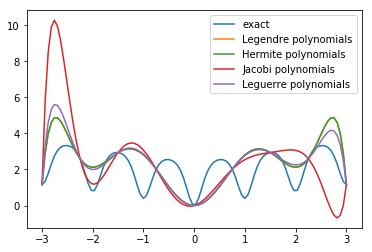

In [25]:
x = np.linspace(-3,3,num=9).reshape((-1,1))
y = [ackley1(x[i]) for i in range(x.shape[0])]

orth = OrthogPolyOptimization(x, y, rho='uniform', opt_method='lm')
orth2 = OrthogPolyOptimization(x, y, rho='gaussian', opt_method='lm')
orth3 = OrthogPolyOptimization(x, y, rho='beta', opt_method='lm')
orth4 = OrthogPolyOptimization(x, y, rho='gamma', opt_method='lm')

x_vals = np.linspace(-3,3,num=100)

plt.clf()
plt.plot(x_vals, [ackley1(i) for i in x_vals], label='exact')
plt.plot(x_vals, [orth.predict(i) for i in x_vals], label='Legendre polynomials')
plt.plot(x_vals, [orth2.predict(i) for i in x_vals], label='Hermite polynomials')
plt.plot(x_vals, [orth3.predict(i) for i in x_vals], label='Jacobi polynomials')
plt.plot(x_vals, [orth4.predict(i) for i in x_vals], label='Leguerre polynomials')
plt.legend(loc='upper right')
plt.show()


In [26]:
orth2.minimize(bounds)
print_out_min(orth2)

x =  [  5.22935362e-15]
y =  [  1.77635684e-15]


# Two-dimensional function

Now we need to test the optimization methods for higher dimensional functions. Here we use the 2D Ackley 1 function. Just like in the 1D case, the theortical global minimum is the origin $\mathbf{x}^*=\mathbf{0}$.

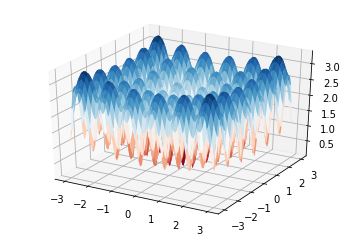

In [27]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def generate_2d_points(fun, n):
    x1 = np.linspace(-3,3,num=n)
    x2 = np.linspace(-3,3,num=n)
    x1, x2 = np.meshgrid(x1, x2)
    
    y = np.zeros(x1.shape)
    for i in range(y.shape[0]):
        for j in range(y.shape[1]):
            y[i,j] = fun([x1[i,j], x2[i,j]])

    return x1, x2, y

x1, x2, y = generate_2d_points(ackley1, 100)
        
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(x1, x2, y, cmap=cm.RdBu)

## Bayesian optimization

We use 2D Sobol sequence to generate the initial points for Bayesian optimization, and remove the true minimum from the sequence as before.

In [28]:
init_x ,init_y = get_sobol_points(16, dim=2)
init_x = np.delete(init_x, 1, 0)
init_y = np.delete(init_y, 1, 0)
print(init_x)
print(init_y)

[[-3.    -3.   ]
 [ 1.5   -1.5  ]
 [-1.5    1.5  ]
 [-0.75  -0.75 ]
 [ 2.25   2.25 ]
 [ 0.75  -2.25 ]
 [-2.25   0.75 ]
 [-1.875 -1.125]
 [ 1.125  1.875]
 [ 2.625 -2.625]
 [-0.375  0.375]
 [-1.125 -1.875]
 [ 1.875  1.125]
 [ 0.375 -0.375]
 [-2.625  2.625]]
[ 1.16470933  2.94149172  2.94149172  2.01604304  2.59833219  2.37797695
  2.37797695  1.299168    1.299168    3.24812672  2.37465204  1.299168
  1.299168    2.37465204  3.24812672]


Although convergence is not reached after 20 steps, it successfuly found the global minimum. 

In [29]:
def initialize_2d_bo(bo):
    bo.initialize(x=init_x, y=init_y)
    
def run_2d_bo(bo, max_steps=20):
    for i in range(max_steps):
        print('Step %d: %f, %f' % (i+1, bo.x_next[0], bo.x_next[1]))
        bo.update([ackley1(bo.x_next)])

bo = BayesianOptimization(bounds=[[-3,3],[-3,3]])
bo.opt_method = 'nelder-mead'
initialize_2d_bo(bo)
run_2d_bo(bo)

Step 1: -2.265886, -2.265886
Step 2: 1.195358, 1.195358
Step 3: -1.355503, -1.355503
Step 4: -2.997062, -2.997062
Step 5: -2.151196, -0.961852
Step 6: -0.915727, -2.188192
Step 7: -1.900216, -0.675246
Step 8: -2.191453, -1.252489
Step 9: 1.601308, 1.528335
Step 10: 1.947321, 0.885096
Step 11: 2.170096, 0.981323
Step 12: 1.667722, 0.758153
Step 13: 1.990233, 0.980332
Step 14: 0.805375, 1.738359
Step 15: 1.147098, 2.213748
Step 16: -1.320069, -2.163460
Step 17: -0.800740, -1.828734
Step 18: 0.000000, 0.000000
Step 19: 0.079599, 0.079606
Step 20: -0.095380, 0.021982


In [30]:
print_out_min(bo)

x =  [ 0.  0.]
y =  4.4408920985e-16


Then, we use the RBF interpolation (with Gaussian kernel) and orthogonal poylnomials representation (Hermite) to approximate the real 2D function. We find that the RBF interpoliation does a pretty good job in this case. However, the orthogonal poylnomials representation is way off near the boundaries, as in the 1D case. For both approximation methhods, we use simulated annealing to find the global minimum.

## Radial basis function (RBF) interpolation

In [31]:
x1, x2, y = generate_2d_points(ackley1, 20)
rbf = RBFOptimization(np.moveaxis(np.array([x1,x2]),0,-1).reshape((-1,2)), np.array(y).reshape((-1,1)), kernel='gaussian')

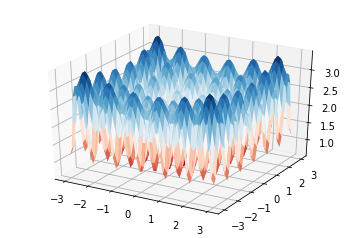

In [32]:
x1, x2, y = generate_2d_points(rbf.interpolate, 50)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, y, cmap=cm.RdBu)

In [33]:
bounds = [[-3,3],[-3,3]]
rbf.opt_method = 'anneal'
rbf.minimize(bounds)

print_out_min(rbf)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000          2.98    90.00%    40.00%     0:00:09     0:00:00

x =  [ 0.06859141 -0.09982613]
y =  0.663129039169


## Orthogonal polynomials representation

In [34]:
x1, x2, y = generate_2d_points(ackley1, 6)
orth = OrthogPolyOptimization(np.moveaxis(np.array([x1,x2]),0,-1).reshape((-1,2)), np.array(y).reshape((-1,1)), rho='gaussian', opt_method='lm')

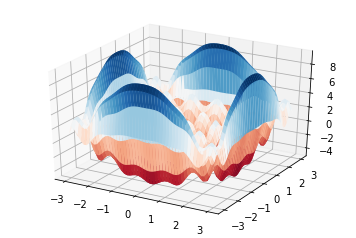

In [35]:
x1, x2 , y = generate_2d_points(orth.predict, 50)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1, x2, y, cmap=cm.RdBu)

In [36]:
orth.opt_method = 'anneal'
orth.minimize(bounds)

print_out_min(orth)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -4.05    20.00%    20.00%     0:00:46     0:00:00

x =  [ 2.21738486  0.01566796]
y =  [-4.99340664]
